In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.1

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
  Using cached scikit_learn-1.2.1-cp39-cp39-macosx_10_9_x86_64.whl (9.1 MB)


In [2]:
import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as
import matplotlib.pyplot as plt 
from tqdm import tqdm
import numpy as np

!curl -L -o student_data.csv "https://seansun.org/17313/P4/ML/student_data.csv"
!curl -L -o model.pkl "https://seansun.org/17313/P4/ML/model.pkl"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26963  100 26963    0     0   180k      0 --:--:-- --:--:-- --:--:--  181k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.3M  100 14.3M    0     0  22.1M      0 --:--:-- --:--:-- --:--:-- 22.1M


In [3]:
# Pydantic Models
class Student(BaseModel):
    student_id: str = Field(alias="Student ID")
    gender: str = Field(alias="Gender")
    age: str = Field(alias="Age")
    major: str = Field(alias="Major")
    gpa: str = Field(alias="GPA")
    extra_curricular: str = Field(alias="Extra Curricular")
    num_programming_languages: str = Field(alias="Num Programming Languages")
    num_past_internships: str = Field(alias="Num Past Internships")

    class Config:
        allow_population_by_field_name = True

In [4]:
class PredictionResult(BaseModel):
    good_employee: int

In [5]:
# Main Functionality
def predict(student):
    '''
    Returns a prediction on whether the student will be a good employee
    based on given parameters by using the ML model

    Parameters
    ----------
    student : dict
        A dictionary that contains all fields in Student
    
    Returns
    -------
    dict
        A dictionary satisfying type PredictionResult, contains a single field
        'good_employee' which is either 1 (will be a good employee) or 0 (will
        not be a good employee)
    '''
    # Use Pydantic to validate model fields exist
    student = parse_obj_as(Student, student)

    clf = joblib.load('./model.pkl')
    
    student = student.dict(by_alias=True)
    query = pd.DataFrame(student, index=[0])
    prediction = clf.predict(query) # TODO: Error handling ??

    return { 'good_employee': prediction[0] }

In [6]:
df = pd.read_csv("./student_data.csv")

In [7]:
dfdict = df.to_dict(orient='records')
for student in tqdm(dfdict):
    student["result"] = predict(student)['good_employee']

100%|██████████| 500/500 [01:51<00:00,  4.50it/s]


In [21]:
acc = 0
acc_count = 0
C = np.zeros((2, 2))
true_pos_female = 0
female_count = 0
true_pos_male = 0
male_count = 0
for student in dfdict:
    if student['Good Candidate'] == student['result']:
        acc += 1
        if student["Gender"] == "F" and student['Good Candidate'] == 1:
            true_pos_female += 1
        elif student["Gender"] == "M" and student['Good Candidate'] == 1:
            true_pos_male += 1
    C[1 - (student['Good Candidate'])][1 - (student['result'])] += 1
    acc_count += 1
    if student["Gender"] == "F" and student['Good Candidate'] == 1:
        female_count += 1
    elif student["Gender"] == "M" and student['Good Candidate'] == 1:
        male_count += 1
print("Accuracy: ", acc/acc_count)
print("Confusion matrix:")
print(C)
print("True positive rate", C[0][0]/(C[0][0] + C[1][0]))
print("True negative rate", C[1][1]/(C[1][1] + C[0][1]))
print("False positive rate", C[1][0]/(C[1][0] + C[1][1]))
print("False positive rate", C[0][1]/(C[0][1] + C[0][0]))
print("True positive female rate (TP for females/TP + FN for females)",
      true_pos_female/female_count)
print("True positive male rate (TP for males/TP + FN for males)",
      true_pos_male/male_count)


Accuracy:  0.832
Confusion matrix:
[[195.  42.]
 [ 42. 221.]]
True positive rate 0.8227848101265823
True negative rate 0.8403041825095057
False positive rate 0.1596958174904943
False positive rate 0.17721518987341772
True positive female rate (TP for females/TP + FN for females) 0.7355371900826446
True positive male rate (TP for males/TP + FN for males) 0.9137931034482759


Bar chart of gender counts


<AxesSubplot:>

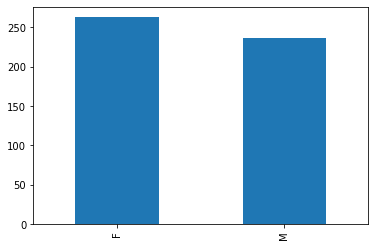

In [9]:
print("Bar chart of gender counts")
df['Gender'].value_counts().plot(kind='bar')

Histogram of age distribution


<AxesSubplot:ylabel='Frequency'>

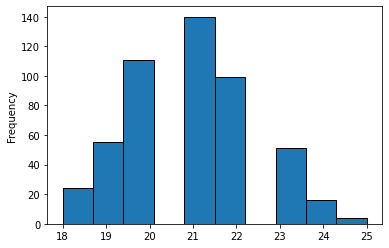

In [10]:
print("Histogram of age distribution")
df['Age'].plot(kind='hist', edgecolor='black')

Bar chart of major counts


<AxesSubplot:>

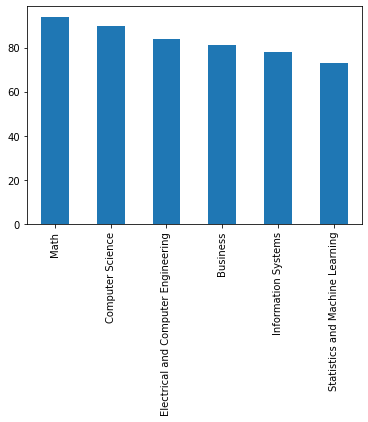

In [11]:
print("Bar chart of major counts")
df['Major'].value_counts().plot(kind='bar')


Histogram of GPA


<AxesSubplot:ylabel='Frequency'>

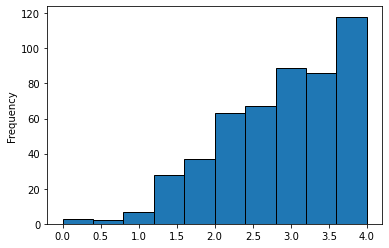

In [12]:
print("Histogram of GPA")
df['GPA'].plot(kind='hist', edgecolor='black')

Bar chart of extracurriculars


<AxesSubplot:>

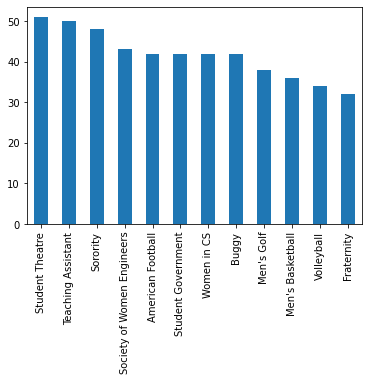

In [13]:
print("Bar chart of extracurriculars")
df['Extra Curricular'].value_counts().plot(kind='bar')


Histogram of number of programming languages


<AxesSubplot:ylabel='Frequency'>

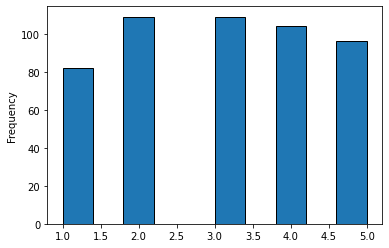

In [14]:
print("Histogram of number of programming languages")
df['Num Programming Languages'].plot(kind='hist', edgecolor='black')


Histogram of number of past internships


<AxesSubplot:ylabel='Frequency'>

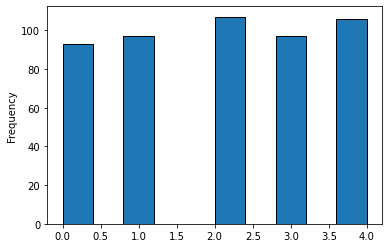

In [15]:
print("Histogram of number of past internships")
df['Num Past Internships'].plot(kind='hist', edgecolor='black')
